<a href="https://colab.research.google.com/github/binarykisu/deep_learning_projects/blob/main/ML_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision

In this project, I make two different machine learning models that train off of the `MNIST()` image dataset. This dataset is provided by TorchVision, and consists of thousands of images of hand-written numbers ranging 0-9. The models try to correctly identify which number is written in each image.

- Model 1 is a non-linear model
- Model 2 is a Convolutionary Neural Network model

The goal is to compare the accuracy and results of both models, seeing which one does a better job with this type of data.

## Importing `MNIST()` from TorchVision

In [79]:
# Importing PyTorch
import torch
from torch import nn

# Importing TorchVision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Check versions to make sure everything is up to date
print(torch.__version__)
print(torchvision.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.1.0+cu121
0.16.0+cu121


'cpu'

Next, I will set up the data using `MNIST()` datasets.


In [80]:
# Setting up training dataset
train_data = datasets.MNIST(
    root="data", # Where to download data to?
    train=True, # Do you want the training dataset?
    download=True, # Do you want to download yes/no?
    transform=ToTensor(), # How do you want to transform the data?
    target_transform=None # Do you want to transform the labels/targets?
)

# Setting up testing dataset
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [81]:
# Checking the length of the datasets
len(train_data), len(test_data)

(60000, 10000)

In [82]:
# Each sample is a tuple of the form: (image, label)
image, label = train_data[0] # Can see the first sample
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [83]:
# Class names
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [84]:
# Class names and their corresponding labels
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [85]:
# Shape of the image can be printed
print(f"Image shape: {image.shape} -> [NCHW], \nLabel: {label}") # Label is just a number
print(f"Image label this image corresponds to: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [NCHW], 
Label: 5
Image label this image corresponds to: 5 - five


The image only has one color channel because it is in black & white, and the image is in the format → `[batch_num, color, height, width]`.


The image can also be visualized!

(-0.5, 27.5, 27.5, -0.5)

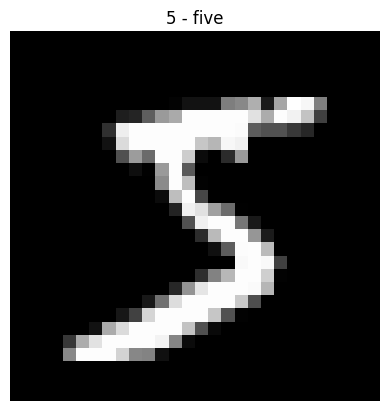

In [86]:
# Importing matplotlib
import matplotlib.pyplot as plt

# Matplotlib expects just the height and width for images (or color channel last)
plt.imshow(image.squeeze(), cmap="gray") # Remember: image, label = train_data[0]
plt.title(class_names[label])
plt.axis(False)

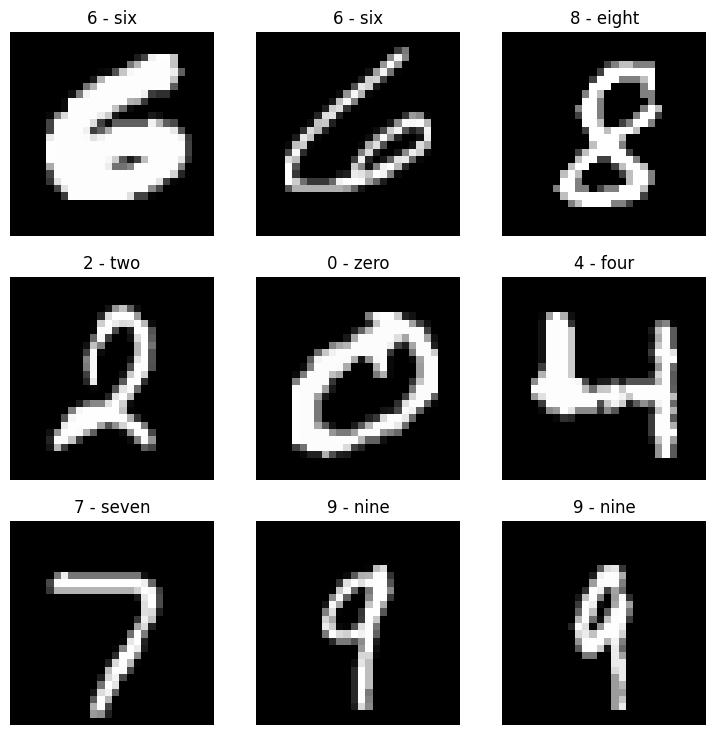

In [87]:
# Plotting even more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3

for i in range(1, rows*cols + 1): # Want to see 9 images
  random_idx = torch.randint(0, len(train_data), size=[1]).item() # Want to keep the images randomized
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

Next, the MNIST train and test datasets will be turned into DataLoaders (Python iterable) using `torch.utils.data.DataLoader` (with `batch_size=32`).

In [88]:
# Importing the DataLoader
from torch.utils.data import DataLoader

# The batch size is a hyperparameter
BATCH_SIZE = 32

# Train dataset -> dataloader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True) # Always want to shuffle training data so the ML algorithm won't accidentally memorize the order of the data

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

print(f"DataLoader objects: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoader objects: (<torch.utils.data.dataloader.DataLoader object at 0x7e26b0298c10>, <torch.utils.data.dataloader.DataLoader object at 0x7e26c01e3f40>)
Length of train dataloader: 1875 batches of 32...
Length of test dataloader: 313 batches of 32...


Now it is time to build (two) models for the datasets!

- I will first build and test the performance of a **non-linear** model
- I will compare it with the performance of a **Convolutional Neural Network** (CNN)

## Model 1: Non-linear

In [89]:
# Create a model with non-linear and linear layers
class MNISTModel(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # Flatten input units into a single vector
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

In [90]:
# Create an instance of model 1
torch.manual_seed(5)
model_1 = MNISTModel(input_shape=784, # This is the 28*28 from flatten
                     hidden_units=10, # Units in the hidden layer
                     output_shape=len(class_names)  # One for every class
                     ).to(device) # Send to gpu if it's available

model_1

MNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [91]:
# Creating a function to calculate the model's accuracy
def accuracy_fn(y_true:torch.Tensor, y_pred:torch.Tensor) -> torch.float:
    """Calculates accuracy between truth labels and predictions.

    Returns the accuracy value between y_true and y_pred
    """
    num_correct = torch.eq(y_true, y_pred).sum().item()
    accuracy = (num_correct / len(y_pred)) * 100 # Percentage form
    return accuracy

# Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr=0.1) # Setting the learning rate to 0.1 at the moment

In [92]:
# Creating a function to see how fast the model runs
from timeit import default_timer as timer

def train_time(start:float, end:float, device:torch.device = None):
  """Prints difference between start and end times."""

  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds.")
  return total_time

In [93]:
# Creating testing and training functions
def train_loop(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device = device):

  # Initializing variables
  train_loss = 0
  train_acc = 0
  # Sending model to device
  model.to(device)

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred = model(X)

    # Calculating the loss and accuracy
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # Going from logits -> prediction labels

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()

  # Calculate the loss and accuracy per epoch and print the results
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_loop(dataloader:torch.utils.data.DataLoader,
              model:torch.nn.Module,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device = device):

  test_loss = 0
  test_acc = 0
  model.to(device)
  model.eval() # put model in eval mode this time

  # Turn on inference context manager
  with torch.inference_mode():
    for X, y in dataloader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # Finding the test loss and accuracy per epoch
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [94]:
# Begin testing and training

from tqdm.auto import tqdm
torch.manual_seed(5) # Initialize random seed

# Start the timer
start_timer = timer()

epochs = 3

for epoch in tqdm(range(1, epochs+1)):
  print(f"Epoch: {epoch}\n---------")

  train_loop(model=model_1,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn
             )

  test_loop(model=model_1,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn
            )

end_timer = timer() # Stop the timer

total_train_time = train_time(start=start_timer, end=end_timer, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1
---------
Train loss: 0.86839 | Train accuracy: 69.61%
Test loss: 0.73866 | Test accuracy: 72.86%

Epoch: 2
---------
Train loss: 0.72715 | Train accuracy: 73.06%
Test loss: 0.72663 | Test accuracy: 72.84%

Epoch: 3
---------
Train loss: 0.70560 | Train accuracy: 73.56%
Test loss: 0.72579 | Test accuracy: 72.97%

Train time on cpu: 33.007 seconds.


Now I want to evaluate this model, because that will allow me to make comparisons between this and the next model.

In [95]:
torch.manual_seed(5) # Initialize with random seed

def eval_model(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device=device):

  """Returns a dictionary containing the results of model predicting on dataloader."""

  loss = 0
  acc = 0

  model.eval() # Put model in eval mode

  with torch.inference_mode():
    for X, y in tqdm(dataloader):
      X, y = X.to(device), y.to(device)

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and accuracy values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale the loss and acc to find the average loss & acc per batch
    loss /= len(dataloader)
    acc /= len(dataloader)

  return {"Model name": model.__class__.__name__, # Only works when model was created wtih a class
          "Model loss": loss.item(),
          "Model accuracy": acc}

In [97]:
# Getting model_1 results
results_1 = eval_model(model=model_1,
                       dataloader=test_dataloader,
                       loss_fn=loss_fn,
                       accuracy_fn=accuracy_fn,
                       device=device)
results_1

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model name': 'MNISTModel',
 'Model loss': 0.7257890701293945,
 'Model accuracy': 72.97324281150159}

## Model 2: Convolutional Neural Network (CNN)

In [108]:
class MNISTModel2(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()

    # Convolution block
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1), # Hyperparameters for the neural network
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2) # Tries to take the max value of the input and gives it as the output
    )

    # Second convolution block
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )

    # Classifier/Output layer:
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7, # This depends on the result of flattening
                out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

_Note: Since this is a grayscale images, the image shape is just 1, so this gets passed into the `ìnput_shape` parameter. In other models where the images are in color, this might change to 3 or something._

In [109]:
torch.manual_seed(5)

# Create a model instance
model_2 = MNISTModel2(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)

In [110]:
# Setup loss function/eval metrics/optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [111]:
# Testing and training the model
torch.manual_seed(5)
torch.cuda.manual_seed(5)

# Measure time taken for this model
from timeit import default_timer as timer
start_time_model_2 = timer()

epochs = 3

for epoch in tqdm(range(1, epochs+1)):
  print(f"Epoch: {epoch}\n-------")

  train_loop(model=model_2,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_loop(model=model_2,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

end_time_model_2 = timer()
total_train_time_model_2 = train_time(start_time_model_2, end_time_model_2, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1
-------
Train loss: 0.31777 | Train accuracy: 89.37%
Test loss: 0.08238 | Test accuracy: 97.45%

Epoch: 2
-------
Train loss: 0.07681 | Train accuracy: 97.65%
Test loss: 0.05885 | Test accuracy: 98.14%

Epoch: 3
-------
Train loss: 0.05868 | Train accuracy: 98.24%
Test loss: 0.04845 | Test accuracy: 98.38%

Train time on cpu: 184.218 seconds.


In [112]:
# Get the results for this model
results_2 = eval_model(model=model_2,
                       dataloader=test_dataloader,
                       loss_fn=loss_fn,
                       accuracy_fn=accuracy_fn,
                       device=device)
results_2

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model name': 'MNISTModel2',
 'Model loss': 0.04845086485147476,
 'Model accuracy': 98.38258785942492}

## Comparing model results

In [113]:
# Comparing the results for both models
import pandas as pd

compare_results = pd.DataFrame([results_1,
                                results_2])
compare_results["training_time"] = [total_train_time,
                                    total_train_time_model_2]

compare_results

,Model name,Model loss,Model accuracy,training_time
0,MNISTModel,0.725789,72.973243,33.006898
1,MNISTModel2,0.048451,98.382588,184.218161


Text(0, 0.5, 'Model')

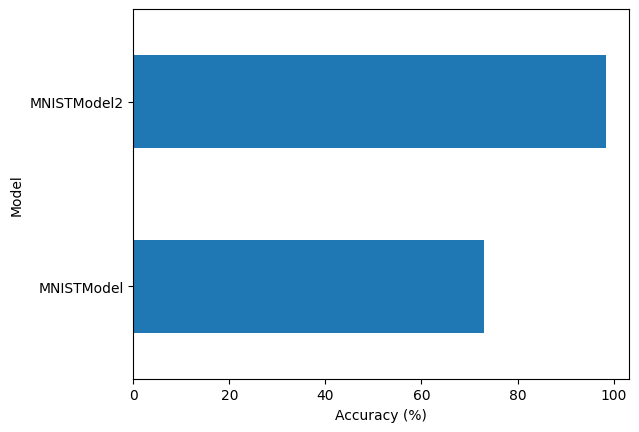

In [115]:
# Visualize these results
compare_results.set_index("Model name")["Model accuracy"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")

Text(0, 0.5, 'Model')

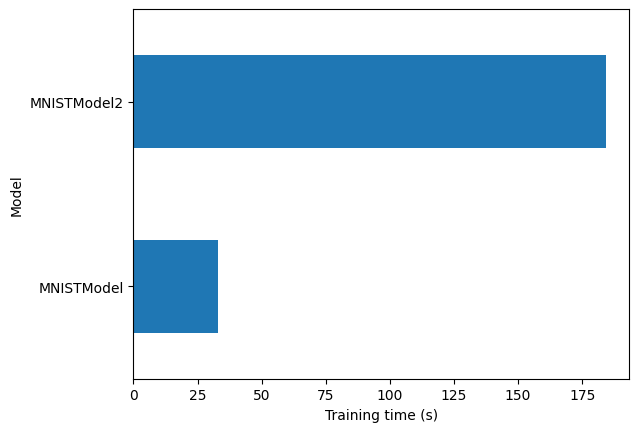

In [116]:
compare_results.set_index("Model name")["training_time"].plot(kind="barh")
plt.xlabel("Training time (s)")
plt.ylabel("Model")

So while the CNN had more success in terms of accuracy, it's good to keep in mind that it did take a bit longer than the first model.

During these tests, I ran everything on a CPU, but this code is device-agnostic and can be re-ran with a GPU. This will improve the training/testing times for both models.

## Creating a Confusion Matrix

Now I will make a **Confusion Matrix** (a confusion matrix compares predictions to true labels) for prediction evaluation.

To make a confusion matrix, I'll go through three steps:

1. Make predictions with the trained CNN model, `model_2`.
2. Make a confusion matrix using `torchmetrics.ConfusionMatrix`.
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`.

In [117]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 9.9 MB/s eta 0:00:00


In [118]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.5 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [120]:
# import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []

model_2.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions.."):
    # Send data and targets to device
    X, y = X.to(device), y.to(device)

    # Do the forward pass
    y_logit = model_2(X)

    # Turn prediction logits into prediction probabilities
    y_pred = torch.softmax(y_logit.squeeze(), dim=1).argmax(dim=1)

    # Put prediction on cpu for evaluation
    y_preds.append(y_pred.cpu())

# Concentrate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions..:   0%|          | 0/313 [00:00<?, ?it/s]

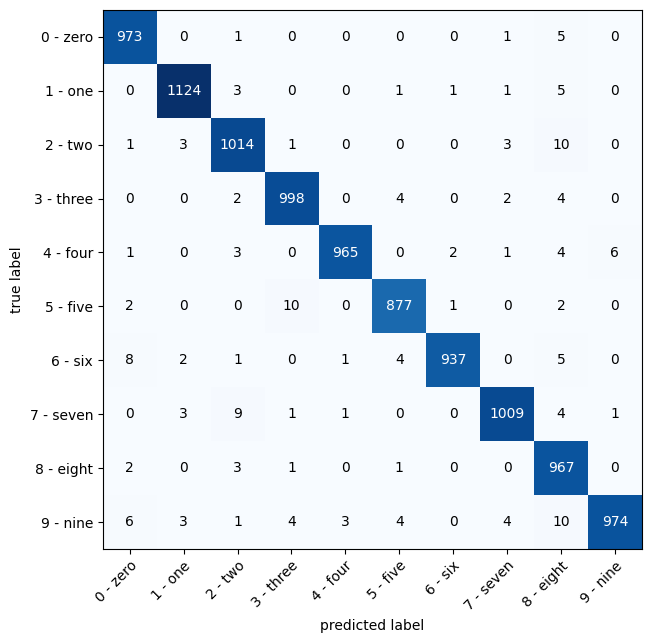

In [121]:
# Making a confusion matrix
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass",
                          num_classes=len(class_names))

confmat_tensor = confmat(preds=y_pred_tensor,
                          target=test_data.targets)  # Targets means labels

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib like working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

As you can see, the CNN model has very high accuracy, and it almost always making the correct prediction. An interesting thing to do is to look at the highest number of "wrong guesses" and see if they logically make sense. For example, it makes sense that the model had a slightly harder time telling "8" and "2" apart. similarly with "8" and "9", "5" and "3", and so on.